## Observations and Insights 

In [3]:
# code taken from https://github.com/TaniaRosasOrtiz/CancerAnalysis_using_LinearRegression/blob/main/Pymaceuticals/pymaceuticals_starter.ipynb to view as an example

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import scipy.stats as st
#from scipy.stats import sem

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='outer')

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
mice_number = len(combined_data["Mouse ID"].value_counts())
mice_number

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data.loc[combined_data.duplicated(["Mouse ID","Timepoint"], keep=False), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_data.loc[combined_data.duplicated(["Mouse ID","Timepoint"], keep=False), :]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data.drop_duplicates(["Mouse ID","Timepoint"], inplace=True)
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_number_clean = len(combined_data["Mouse ID"].value_counts())
mice_number_clean

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance (df.var()['column']), standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Mean
mean_data = combined_data.groupby(['Drug Regimen','Timepoint'])['Tumor Volume (mm3)'].mean()
mean_data = mean_data.reset_index()
mean_data.head()

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [10]:
# Median
median_data = combined_data.groupby(['Drug Regimen','Timepoint'])['Tumor Volume (mm3)'].median()
median_data = median_data.reset_index()
median_data.head()

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,45.597064
2,Capomulin,10,43.421014
3,Capomulin,15,42.798160
4,Capomulin,20,40.716428


In [11]:
# variance
variance_data = combined_data.groupby(['Drug Regimen','Timepoint'])['Tumor Volume (mm3)'].var()
variance_data = variance_data.reset_index()
variance_data.head()

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,5.030889
2,Capomulin,10,12.344133
3,Capomulin,15,16.878693
4,Capomulin,20,19.035028


In [12]:
# standard deviation
stdev_data = combined_data.groupby(['Drug Regimen','Timepoint'])['Tumor Volume (mm3)'].std()
stdev_data = stdev_data.reset_index()
stdev_data.head()

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,2.242964
2,Capomulin,10,3.513422
3,Capomulin,15,4.108369
4,Capomulin,20,4.362915


In [13]:
# Standard Error of the tumor volume
sem_data = combined_data.groupby(['Drug Regimen','Timepoint'])['Tumor Volume (mm3)'].sem()
sem_data = pd.DataFrame(sem_data).reset_index()
sem_data.head()

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Create Summary DataFrame
stat_tumor_vol_df = pd.merge(mean_data, median_data, on=['Drug Regimen','Timepoint'])
stat_tumor_vol_df.rename(columns = {'Tumor Volume (mm3)_x':'Mean', 'Tumor Volume (mm3)_y':'Median'}, inplace = True)
stat_tumor_vol_df["Variance"] = variance_data["Tumor Volume (mm3)"]
stat_tumor_vol_df["Std Deviation"] = stdev_data["Tumor Volume (mm3)"]
stat_tumor_vol_df["SEM"] = sem_data["Tumor Volume (mm3)"]
stat_tumor_vol_df.head()

,Drug Regimen,Timepoint,Mean,Median,Variance,Std Deviation,SEM
0,Capomulin,0,45.000000,45.000000,0.000000,0.000000,0.000000
1,Capomulin,5,44.266086,45.597064,5.030889,2.242964,0.448593
2,Capomulin,10,43.084291,43.421014,12.344133,3.513422,0.702684
3,Capomulin,15,42.064317,42.798160,16.878693,4.108369,0.838617
4,Capomulin,20,40.716325,40.716428,19.035028,4.362915,0.909731


In [15]:
# Using the aggregation method, produce the same summary statistics in a single line

# Calculations on data set
drugs_total = len(stat_tumor_vol_df["Drug Regimen"].unique())
timepoint_total = stat_tumor_vol_df["Timepoint"].count()
mean_total = stat_tumor_vol_df["Mean"].mean()
median_total = stat_tumor_vol_df["Median"].median()
variance_total = stat_tumor_vol_df["Variance"].var()
std_deviation_total = stat_tumor_vol_df["Std Deviation"].std()
sem_total = stat_tumor_vol_df["SEM"].sem()

# Create Summary DataFrame
stat_tumor_vol_summary_df = pd.DataFrame({
    "Number of Drugs Used": [drugs_total],
    "Total Timepoints": [timepoint_total],
    "Mean": [mean_total],
    "Median": [median_total],
    "Variance": [variance_total],
    "Standard Deviation": [std_deviation_total],
    "SEM": [sem_total]
})
stat_tumor_vol_summary_df

,Number of Drugs Used,Total Timepoints,Mean,Median,Variance,Standard Deviation,SEM
0,10,100,52.333997,51.268377,74.434111,1.554086,0.042705


## Bar and Pie Charts

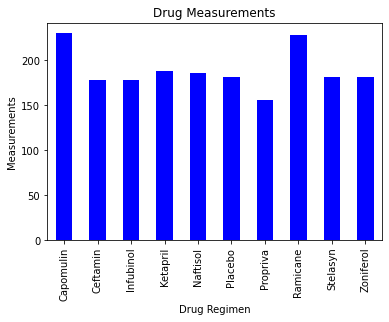

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_timepoint_df = combined_data.groupby('Drug Regimen')['Timepoint'].count()

# Chart our data, set title, and label the axes
drug_timepoint_chart = drug_timepoint_df.plot(kind="bar", color="b", title="Drug Measurements")
drug_timepoint_chart.set_xlabel("Drug Regimen")
drug_timepoint_chart.set_ylabel("Measurements")
plt.show()
#plt.savefig('images/drugs.png')

In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_timepoint_df = pd.DataFrame(drug_timepoint_df).reset_index()
plt.bar(drug_timepoint_df["Drug Regimen"], drug_timepoint_df["Timepoint"], width=0.5, color="b", align="center")
plt.title("Drug Measurements")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements")
plt.xticks(rotation="vertical")

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Split data based on gender
gender_data = combined_data.groupby('Sex')['Mouse ID'].nunique()

# Create pie chart
gender_pie = gender_data.plot(kind="pie", y='Mouse ID', autopct='%1.1f%%', colors=['salmon', 'green'], title=("Gender Distribution"))
gender_pie.set_ylabel("Number of Mice")

plt.show()

In [ ]:
gender_data = pd.DataFrame(gender_data).reset_index()
gender_data

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_data['Sex']
mice = gender_data['Mouse ID']
explode = (0, 0)
colors = ['salmon', 'green']

plt.pie(mice, explode=explode, labels=labels, autopct="%1.1f%%", colors=colors, shadow=False, startangle=0)
plt.title("Gender Distribution")
plt.ylabel("Number of Mice")

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = combined_data.groupby('Mouse ID')['Timepoint'].max()
last_timepoint_df = pd.DataFrame(last_timepoint_df).reset_index()
last_timepoint_df

In [ ]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_new_df = pd.merge(combined_data, last_timepoint_df, how='right', on=['Mouse ID','Timepoint']) 
last_timepoint_new_df.head()

In [ ]:
last_timepoint_new_df.describe()

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_list = last_timepoint_new_df['Drug Regimen']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = last_timepoint_new_df['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = last_timepoint_new_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine outliers using upper and lower bounds
#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)
# No outliers found using iqr, instead trying quantile %
lower_bound, upper_bound = last_timepoint_new_df['Tumor Volume (mm3)'].quantile([0.01, 0.99])
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
outlier_tumor = last_timepoint_new_df.loc[(last_timepoint_new_df['Tumor Volume (mm3)'] < lower_bound) | (last_timepoint_new_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_tumor

In [ ]:
# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_drug_data = last_timepoint_new_df.loc[(last_timepoint_new_df['Tumor Volume (mm3)'] > lower_bound) & 
                                            (last_timepoint_new_df['Tumor Volume (mm3)'] < upper_bound), 
                                           ["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
tumor_drug_data 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Capomulin, Ramicane, Infubinol, and Ceftamin

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_drug_data = tumor_drug_data.loc[tumor_drug_data['Drug Regimen'].isin(drugs), :]

In [ ]:
tumor_drug_data.boxplot(by='Drug Regimen', column=['Tumor Volume (mm3)'], grid=False)

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_data = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin', ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
capomulin_tumor_vol = capomulin_data.loc[capomulin_data["Mouse ID"] == 's185', 'Tumor Volume (mm3)']
capomulin_timepoint = capomulin_data.loc[capomulin_data["Mouse ID"] == 's185', 'Timepoint']
plt.plot(capomulin_timepoint, capomulin_tumor_vol)
plt.title("Tumor Volume vs. Timepoint for Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
plt.savefig('images/tumorvstime.jpg', dpi=300, bbox_inches='tight')

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_data = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin', ["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]]
capomulin_tumor_avg = capomulin_data.groupby("Mouse ID")['Tumor Volume (mm3)'].mean()
capomulin_weight = capomulin_data.groupby("Mouse ID")['Weight (g)'].mean()
capomulin_df = pd.merge(capomulin_tumor_avg, capomulin_weight, how='right', on='Mouse ID') 

capomulin_tumor_serie = capomulin_df['Tumor Volume (mm3)']
capomulin_weight_serie = capomulin_df['Weight (g)']


plt.scatter(capomulin_tumor_serie, capomulin_weight_serie, marker="o", facecolors="red", edgecolors="black")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin regimen")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.savefig('images/scatter.png')

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_weight_serie,capomulin_tumor_serie)
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [ ]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_tumor_serie, capomulin_weight_serie)
regress_values = capomulin_tumor_serie * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capomulin_tumor_serie, capomulin_weight_serie)
plt.plot(capomulin_tumor_serie,regress_values,"r-")
plt.annotate(line_eq,(35,24),fontsize=15,color="red")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin regimen")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()
plt.savefig('images/linearregression.jpg', dpi=300, bbox_inches='tight')